Capstone project # 2: Heart attack mortality prediction based on select features

***Dataset Source:*** https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020)

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020)

***Goal:*** Identify the top 3 features that lead to more than 70% heart attack mortality.

***Unknowns:*** Were all the patients blood works done at the same time in the treatment period?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_source_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(data_source_url)

In [3]:
data.columns
data = data.rename(columns = {'time': 'days_to_followup'})

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,days_to_followup,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.loc[data['sex'] == 1, 'sex'] = 'M'
data.loc[data['sex'] == 0, 'sex'] = 'F'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  days_to_followup          299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB


In [7]:
data_T = data.T[:]

In [8]:
data['days_to_followup'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: days_to_followup, dtype: float64

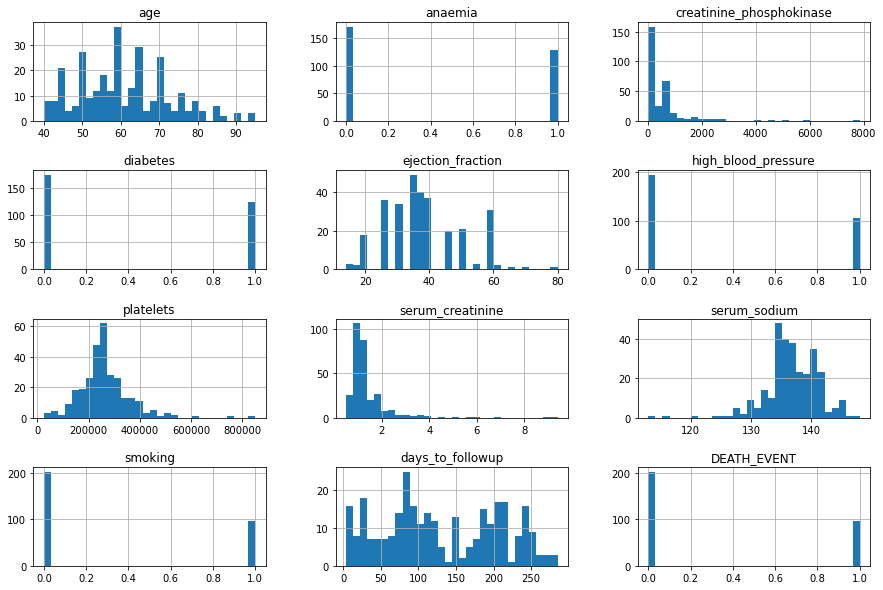

In [9]:
data.hist(figsize=(15,10), bins=30)
plt.subplots_adjust(hspace=0.5);

In [10]:
#Above Death Event hist plot shows that ~ 99 / 299 patients died during the followup period

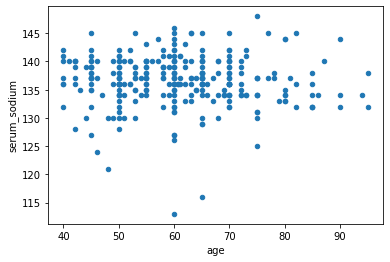

In [13]:
data.plot(x='age', y='serum_sodium', kind='scatter');

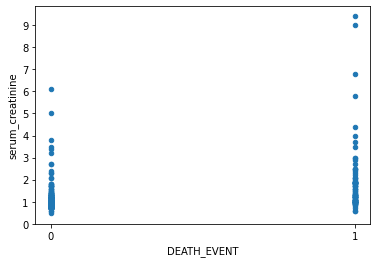

In [32]:
data.plot(x='DEATH_EVENT', y='serum_creatinine', kind='scatter')
plt.xticks(ticks = [0, 1])
plt.yticks(ticks = np.arange(0, 10, step=1));

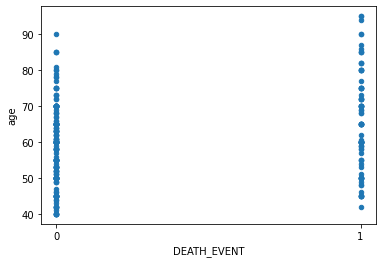

In [35]:
data.plot(x='DEATH_EVENT', y='age', kind='scatter')
plt.xticks(ticks = [0, 1]);


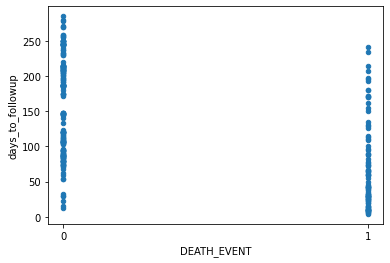

In [37]:
data.plot(x='DEATH_EVENT', y='days_to_followup', kind='scatter')
plt.xticks(ticks = [0, 1]);
#Post heart attack 

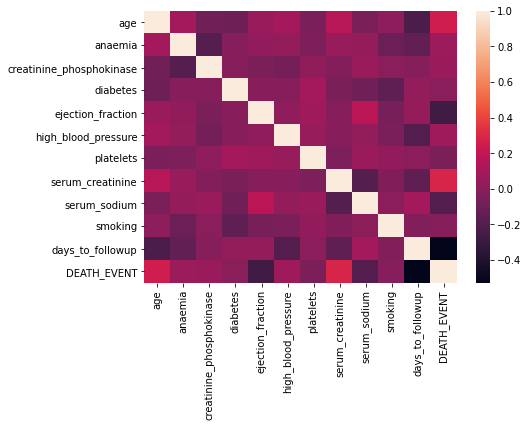

In [23]:
plt.subplots(figsize=(7,5))
sns.heatmap(data.corr());

In [38]:
#observations based on correlation heatmap
#(age, death_event)
#(serum_creatnine, death_event)


In [66]:
data_deaths = data.loc[data.DEATH_EVENT == 1, :]
data_nodeaths = data.loc[data.DEATH_EVENT == 0, :]


In [67]:
data_deaths.shape
data_nodeaths.shape

(203, 13)

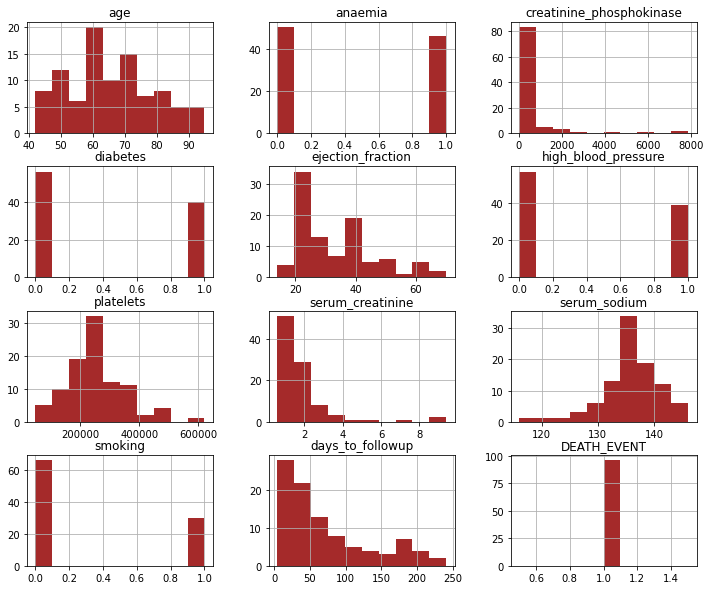

In [76]:
plot1 = data_deaths.hist(figsize=(12,10), color='brown');

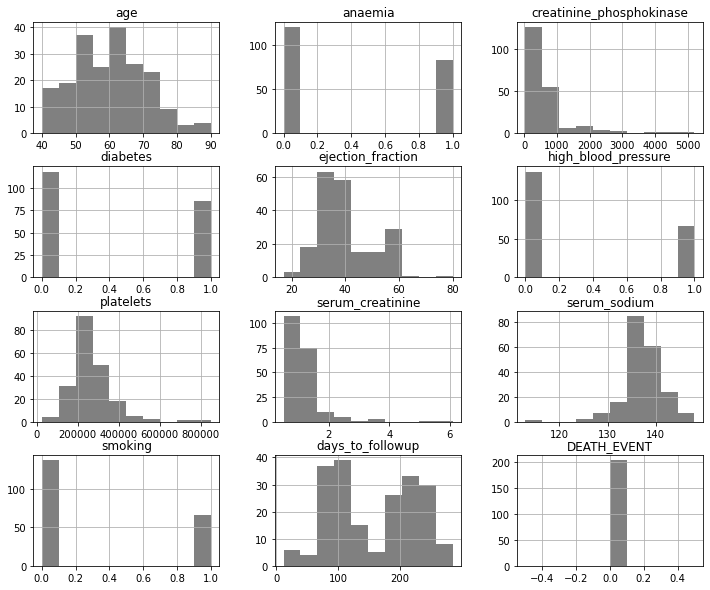

In [72]:
plot2 = data_nodeaths.hist(figsize=(12,10), color='grey');

In [77]:
# need to normalize, I think because there are ~200 no deaths vs ~99 deaths